# [십자가 찾기](https://www.acmicpc.net/problem/16924)

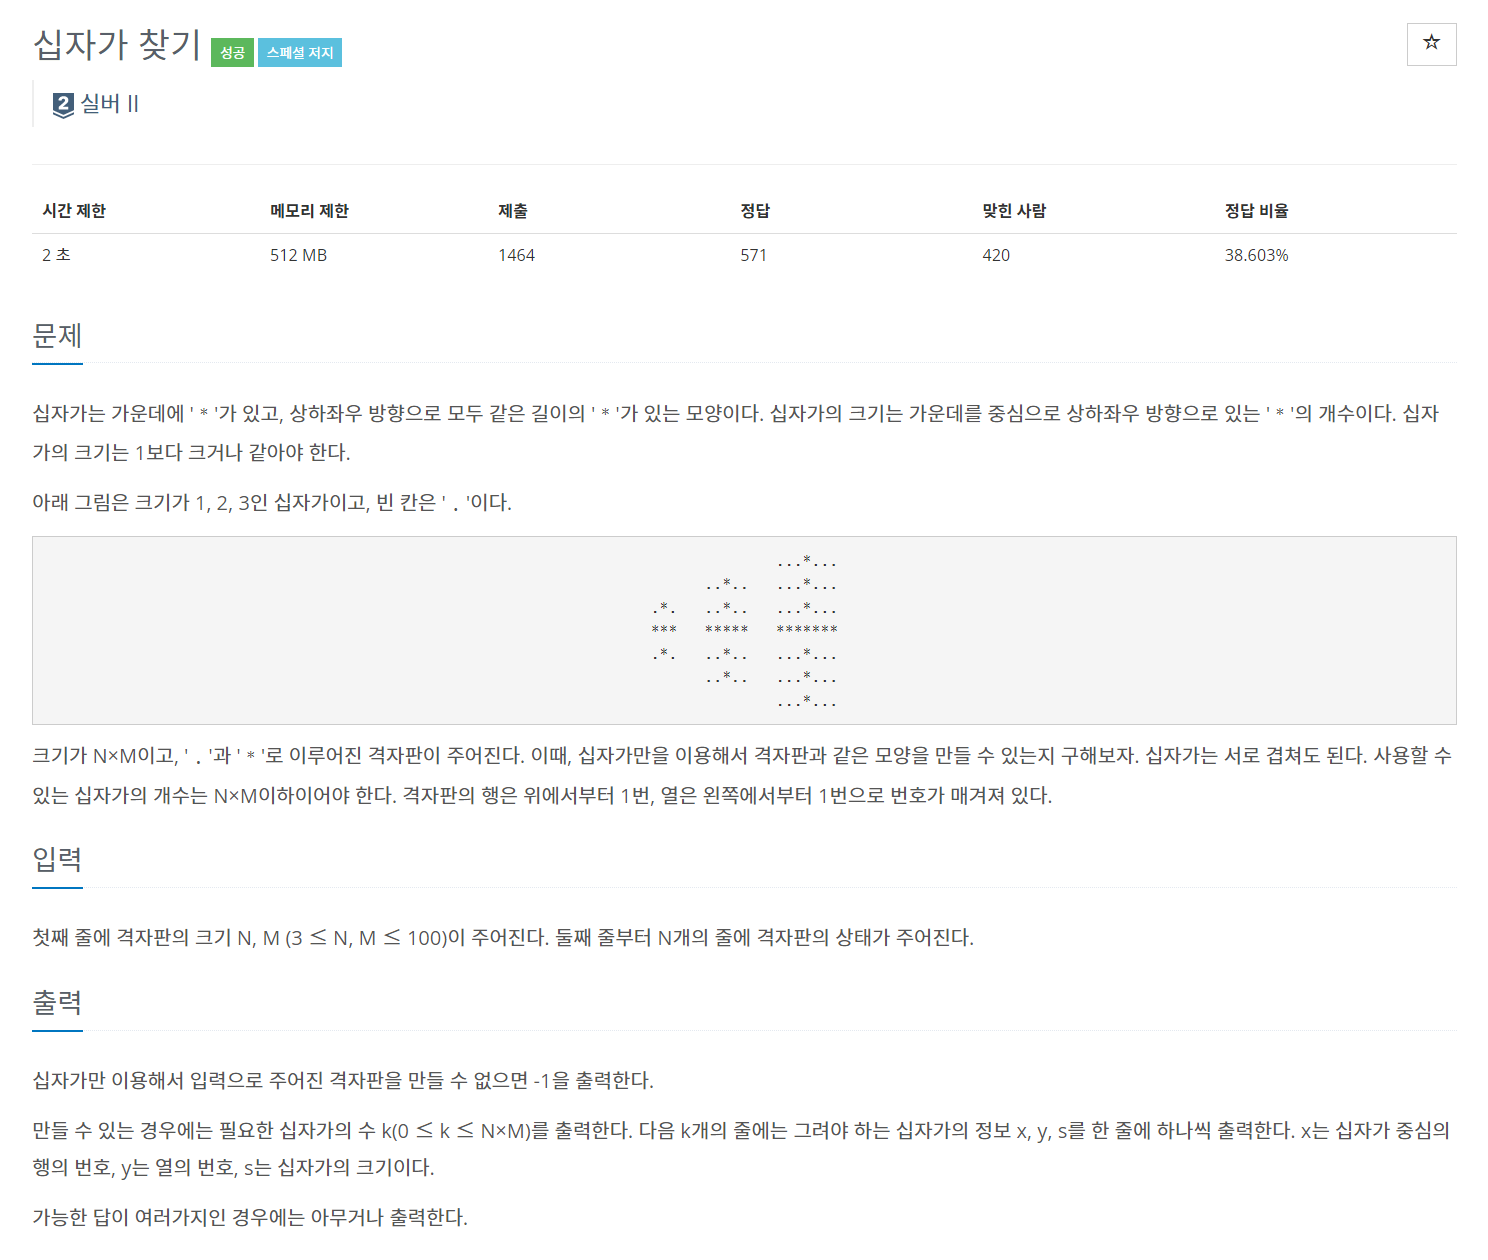

In [ ]:
import sys

## 십자가가 가능한지, 가능하다면 가장 긴 크기를 반환하는 함수

In [ ]:
def cross_check(i, j, length):  # 십자가의 중심점, 십자가 크기
    l = length
    for nn in range(length, 0, -1):
        for k in range(4):
            x, y = i + dx[k]*nn, j + dy[k]*nn
            if 0 <= x < n and 0 <= y < m and graph[x][y] == '*':
                continue
            else:
                l = nn-1
                break
    return l

<!-- ![](image/16924.png) -->
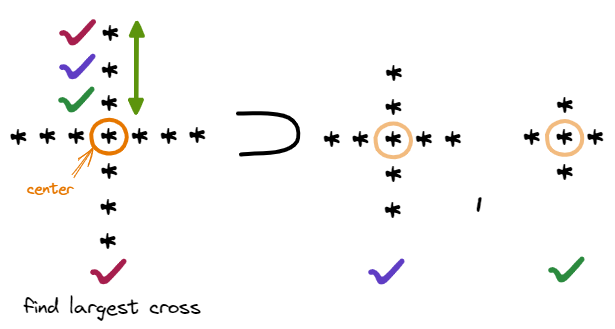

## 별의 방문 체크를 해주고 남은 별의 개수를 세주는 함수

In [ ]:
def visit(i, j, n):
    global star
    if not visited[i][j]:
        visited[i][j] = True
        star -= 1
    for nn in range(1, n+1):
        for k in range(4):
            x, y = i + dx[k]*nn, j + dy[k]*nn
            if not visited[x][y]:
                visited[x][y] = True
                star -= 1

In [ ]:
input = sys.stdin.readline

In [ ]:
n, m = map(int, input().split())
graph = []
visited = [[False]*m for _ in range(n)]
star = 0
stack = []  # 십자가의 중심점이 될 가능성이 있는 위치
size = [0]*(n)  # 각 행별로 가능한 십자가의 최대 가로 길이
dx = [0, 1, 0, -1]
dy = [1, 0, -1, 0]

In [ ]:
# 입력 받으면서 확인해야 할 별의 개수와 십자가의 중심점이 될 수 있는 위치 미리 확인(해당 행에서 가장 긴 십자가의 가로 길이도 체크)
for i in range(n):
    graph.append(list(input().rstrip()))
    num = 0
    for j in range(m):
        if graph[i][j] == '*':
            star += 1  # *의 개수
            num += 1 
            if num >= 3: # 연속된 별의 개수가 3개 이상일때 중심점의 가능성이 있다.
                stack.append((i, j-1))
                size[i] = max(size[i], num) # 그때 가능한 십자가의 가로 실이
        else:
            num = 0

In [ ]:
# 십자가의 개수
cross = 0
# 십자가의 위치
location = []

In [ ]:
for i, j in stack:
    nn = 0
    if size[i] % 2 == 0:
        nn = (size[i]-1)//2
    else:
        nn = size[i]//2
    if nn > 0:
        a = cross_check(i, j, nn)
        if a:  # i,j위치에서 가질 수 잇는 십자가의 최대 길이
            cross += a # 최대 길이 = 이 중심점에서의 십자가의 가능 개수
            visit(i, j, a)
            for u in range(1, a+1):
                location.append("%d %d %d" % (i+1, j+1, u))

In [ ]:
if star > 0:
    print(-1)
else:
    print(cross)
    for loc in location:
        print(loc)